In [2]:
import pandas as pd
filter_file= pd.read_csv('filtered_file.csv')
filter_file

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,...,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,6,29/05/2006,29/05/2016,29/05/2017,21/10/1966,10/09/1990,0,13,1,2,...,0,0,2006,87,1598,9927.00,4,P,4.250,1055
1,6,29/05/2006,29/05/2017,29/05/2018,21/10/1966,10/09/1990,0,13,1,2,...,0,0,2006,87,1598,9927.00,4,P,4.250,1055
2,6,29/05/2006,29/05/2018,29/05/2019,21/10/1966,10/09/1990,0,13,1,2,...,0,0,2006,87,1598,9927.00,4,P,4.250,1055
3,7,11/02/2015,11/02/2016,11/02/2017,14/05/1946,24/03/2000,1,3,1,1,...,0,0,2009,109,1396,16550.00,5,P,4.245,1168
4,8,28/05/2001,28/05/2016,28/05/2017,11/05/1941,01/08/1962,0,18,1,2,...,0,0,2001,130,1984,27330.00,4,P,4.547,1310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68954,53435,04/12/2017,04/12/2017,04/12/2018,12/03/1986,26/02/2016,0,2,2,2,...,0,0,2005,140,1968,28050.00,5,D,4.458,1489
68955,53441,22/11/2017,22/11/2017,22/11/2018,08/02/1964,06/05/1982,0,2,1,1,...,0,0,1991,60,1389,11575.49,5,P,4.050,995
68956,53441,22/11/2017,22/11/2018,22/11/2019,08/02/1964,06/05/1982,0,2,1,1,...,0,0,1991,60,1389,11575.49,5,P,4.050,995
68957,53442,19/06/2018,19/06/2018,19/06/2019,01/04/1969,25/03/1988,0,1,1,1,...,1,1,1999,135,1998,21239.77,5,P,4.740,1453


In [3]:
filter_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68959 entries, 0 to 68958
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    68959 non-null  int64  
 1   Date_start_contract   68959 non-null  object 
 2   Date_last_renewal     68959 non-null  object 
 3   Date_next_renewal     68959 non-null  object 
 4   Date_birth            68959 non-null  object 
 5   Date_driving_licence  68959 non-null  object 
 6   Distribution_channel  68959 non-null  int64  
 7   Seniority             68959 non-null  int64  
 8   Policies_in_force     68959 non-null  int64  
 9   Max_policies          68959 non-null  int64  
 10  Max_products          68959 non-null  int64  
 11  Lapse                 68959 non-null  int64  
 12  Date_lapse            24846 non-null  object 
 13  Payment               68959 non-null  int64  
 14  Premium               68959 non-null  float64
 15  Cost_claims_year   

Based on this the missing value mainly lies in date_lapse, type_fuel(a very few and length cuz bikes/no door vehicles dont have length)

In [4]:
target=filter_file['Cost_claims_year']
print(target.describe())
print(target.quantile([0.90,0.95,0.99]))

count     68959.000000
mean        235.048962
std        1822.256673
min           0.000000
25%           0.000000
50%           0.000000
75%          63.340000
max      260853.240000
Name: Cost_claims_year, dtype: float64
0.90     579.3480
0.95     949.1100
0.99    3832.8568
Name: Cost_claims_year, dtype: float64


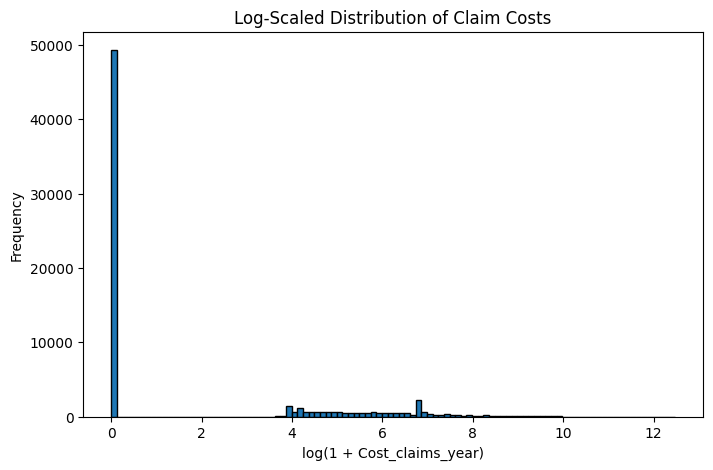

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(np.log1p(filter_file['Cost_claims_year']), bins=100, edgecolor='k')
plt.title('Log-Scaled Distribution of Claim Costs')
plt.xlabel('log(1 + Cost_claims_year)')
plt.ylabel('Frequency')
plt.show()


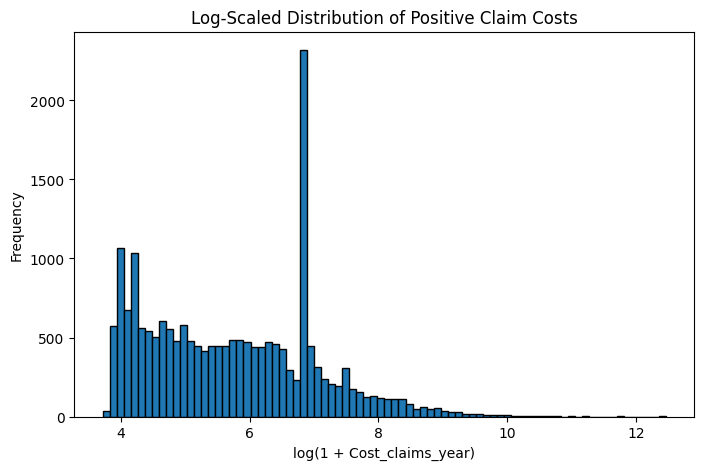

In [6]:
claims_positive = filter_file[filter_file['Cost_claims_year'] > 0]['Cost_claims_year']

plt.figure(figsize=(8,5))
plt.hist(np.log1p(claims_positive), bins=80, edgecolor='k')
plt.title('Log-Scaled Distribution of Positive Claim Costs')
plt.xlabel('log(1 + Cost_claims_year)')
plt.ylabel('Frequency')
plt.show()

In [7]:
claims_positive = filter_file[filter_file['Cost_claims_year'] > 0]['Cost_claims_year']
print("Number of non-zero claim rows:", len(claims_positive))
print("Total rows in dataset:", len(filter_file))
print("Percentage of positive claims:", len(claims_positive) / len(filter_file) * 100)

Number of non-zero claim rows: 19646
Total rows in dataset: 68959
Percentage of positive claims: 28.489392247567398


In [8]:
numeric_cols = [
    'Premium', 'Value_vehicle', 'Power', 'Cylinder_capacity',
    'Weight', 'Length', 'Seniority', 'R_Claims_history', 'N_claims_history'
]

In [9]:
subset = filter_file[numeric_cols + ['Cost_claims_year']].dropna()

In [10]:
corr_raw = subset.corr()['Cost_claims_year'].sort_values(ascending=True)
corr_log = subset.corrwith(np.log1p(subset['Cost_claims_year'])).sort_values(ascending=True)

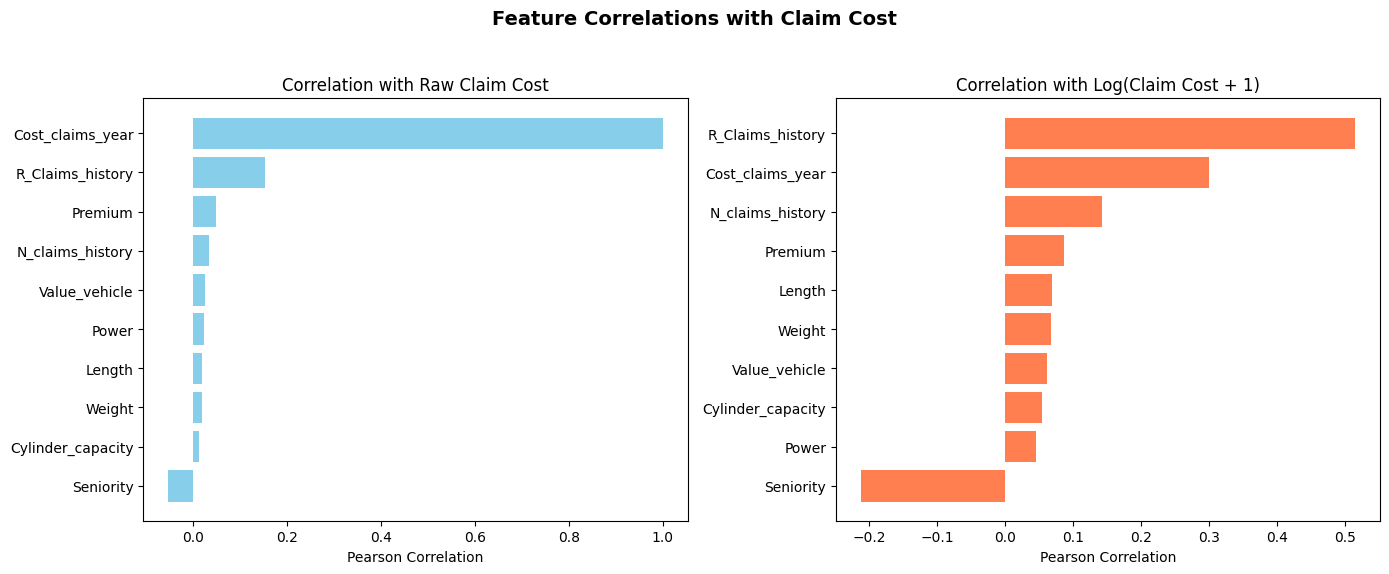

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].barh(corr_raw.index, corr_raw.values, color='skyblue')
axes[0].set_title('Correlation with Raw Claim Cost', fontsize=12)
axes[0].set_xlabel('Pearson Correlation')

axes[1].barh(corr_log.index, corr_log.values, color='coral')
axes[1].set_title('Correlation with Log(Claim Cost + 1)', fontsize=12)
axes[1].set_xlabel('Pearson Correlation')

plt.suptitle('Feature Correlations with Claim Cost', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [12]:
corr_raw_table = corr_raw.drop('Cost_claims_year', errors='ignore')
corr_log_table = corr_log.drop('Cost_claims_year', errors='ignore')

corr_summary = pd.DataFrame({
    'Correlation (Raw Target)': corr_raw_table.round(3),
    'Correlation (Log Target)': corr_log_table.round(3)
}).sort_values(by='Correlation (Log Target)', ascending=False)

print("Feature Correlations with Claim Cost")
display(corr_summary)


Feature Correlations with Claim Cost


,Correlation (Raw Target),Correlation (Log Target)
R_Claims_history,0.153,0.514
N_claims_history,0.034,0.142
Premium,0.050,0.086
Length,0.019,0.069
Weight,0.019,0.067
Value_vehicle,0.026,0.061
Cylinder_capacity,0.013,0.054
Power,0.023,0.045
Seniority,-0.054,-0.213


So now with the given correlation we are gonna be taking the features and target to do a simple linear regression

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [14]:
features = [
    'R_Claims_history', 'N_claims_history', 'Premium',
    'Value_vehicle', 'Length', 'Weight', 'Cylinder_capacity',
    'Power', 'Seniority'
]

In [15]:
X = filter_file[features].fillna(0)
y = filter_file['Cost_claims_year']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
print(f"Baseline MSE (Raw Target): {mse:.2f}")

Baseline MSE (Raw Target): 2808590.91


In [19]:
y_log = np.log1p(y)
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

model_log = LinearRegression()
model_log.fit(X_train, y_train_log)

y_pred_log = model_log.predict(X_test)
mse_log = mean_squared_error(y_test_log, y_pred_log)

print(f"Baseline MSE (Log-Transformed Target): {mse_log:.4f}")

#this is log form to stabilize variance

Baseline MSE (Log-Transformed Target): 5.4614


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

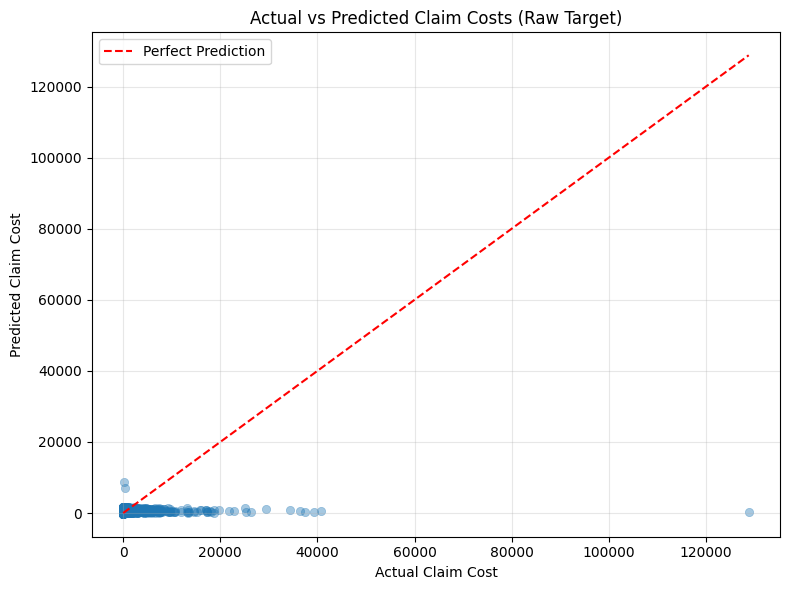

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, edgecolor=None)
plt.plot([0, y_test.max()], [0, y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Claim Cost")
plt.ylabel("Predicted Claim Cost")
plt.title("Actual vs Predicted Claim Costs (Raw Target)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


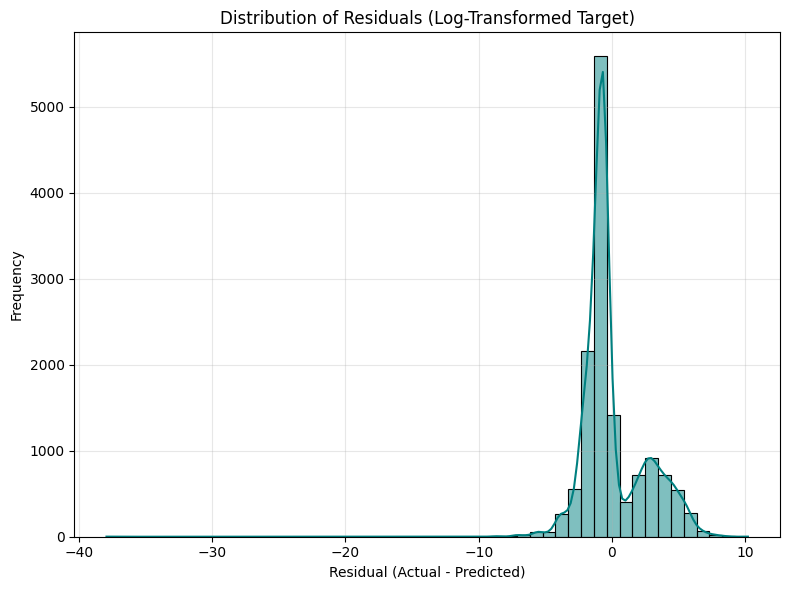

In [22]:
residuals = y_test_log - y_pred_log

plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=50, kde=True, color="teal")
plt.title("Distribution of Residuals (Log-Transformed Target)")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

MSE after filterning only positive claims

In [23]:
nonzero_data = filter_file[filter_file['Cost_claims_year'] > 0]
print(f"Non-zero claims: {len(nonzero_data)} records")


Non-zero claims: 19646 records


In [24]:
X_nz = nonzero_data[features].fillna(0)
y_nz = nonzero_data['Cost_claims_year']

X_train_nz, X_test_nz, y_train_nz, y_test_nz = train_test_split(X_nz, y_nz, test_size=0.2, random_state=42)


In [25]:
model_nz = LinearRegression()
model_nz.fit(X_train_nz, y_train_nz)
y_pred_nz = model_nz.predict(X_test_nz)

mse_nz = mean_squared_error(y_test_nz, y_pred_nz)
print(f"MSE (Non-Zero Claims Only): {mse_nz:.2f}")


MSE (Non-Zero Claims Only): 3809397.56


In [26]:
y_log_nz = np.log1p(y_nz)
X_train_nz, X_test_nz, y_train_log_nz, y_test_log_nz = train_test_split(X_nz, y_log_nz, test_size=0.2, random_state=42)

model_log_nz = LinearRegression()
model_log_nz.fit(X_train_nz, y_train_log_nz)
y_pred_log_nz = model_log_nz.predict(X_test_nz)

mse_log_nz = mean_squared_error(y_test_log_nz, y_pred_log_nz)
print(f"MSE (Log Target, Non-Zero Claims): {mse_log_nz:.4f}")


MSE (Log Target, Non-Zero Claims): 1.5924


In [27]:
rmse_all = mse ** 0.5
rmse_nonzero = mse_nz ** 0.5
print(rmse_all, rmse_nonzero)


1675.885112893311 1951.7678050886877


In [28]:
#now we gonna go with loss at risk function to try minimize the huge loss
import numpy as np
from sklearn.metrics import mean_squared_error

def loss_at_risk(y_true, y_pred, alpha=0.5):
    """
    Custom Loss-at-Risk (LaR) function.
    alpha controls how much extra weight to give large claims.
    """

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    w = 1 + alpha * (y_true / np.max(y_true))
    weighted_mse = np.mean(w * (y_true - y_pred) ** 2)
    return weighted_mse


In [29]:
from sklearn.linear_model import LinearRegression

model_lar = LinearRegression()
model_lar.fit(X_train, y_train)
y_pred_lar = model_lar.predict(X_test)


In [30]:
mse_raw = mean_squared_error(y_test, y_pred_lar)
lar_loss = loss_at_risk(y_test, y_pred_lar, alpha=0.5)

print(f"MSE (Baseline): {mse_raw:.2f}")
print(f"Loss-at-Risk (α=0.5): {lar_loss:.2f}")


MSE (Baseline): 2808590.91
Loss-at-Risk (α=0.5): 3540791.55


for non-zero claims loss at risk

In [31]:

nonzero = filter_file[filter_file['Cost_claims_year'] > 0]
X_nz = nonzero[features].fillna(0)
y_nz = nonzero['Cost_claims_year']
from sklearn.model_selection import train_test_split
X_train_nz, X_test_nz, y_train_nz, y_test_nz = train_test_split(
    X_nz, y_nz, test_size=0.2, random_state=42
)


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_nz = LinearRegression()
model_nz.fit(X_train_nz, y_train_nz)
y_pred_nz = model_nz.predict(X_test_nz)

mse_nz = mean_squared_error(y_test_nz, y_pred_nz)


In [33]:
lar_nz = loss_at_risk(y_test_nz, y_pred_nz, alpha=0.5)

print(f"MSE (Non-Zero Claims): {mse_nz:.2f}")
print(f"Loss-at-Risk (α=0.5, Non-Zero Claims): {lar_nz:.2f}")


MSE (Non-Zero Claims): 3809397.56
Loss-at-Risk (α=0.5, Non-Zero Claims): 4591564.26


In [34]:
q90 = np.quantile(y_test, 0.90)
q99 = np.quantile(y_test, 0.99)

low_idx = y_test < q90
high_idx = (y_test >= q90) & (y_test < q99)
extreme_idx = y_test >= q99
y_pred_base = y_pred.copy()

print(f"Low claims (0-90%): {low_idx.sum()}")
print(f"High claims (90-99%): {high_idx.sum()}")
print(f"Extreme claims (≥99%): {extreme_idx.sum()}")

Low claims (0-90%): 12412
High claims (90-99%): 1242
Extreme claims (≥99%): 138


In [35]:
alphas = [0.1, 0.3, 0.5, 0.7, 1.0, 2.0]
results = []

for alpha in alphas:
    weights = 1 + alpha * (y_train / np.max(y_train))
    model_temp = LinearRegression()
    model_temp.fit(X_train, y_train, sample_weight=weights)
    y_pred_temp = model_temp.predict(X_test)
    mse_extreme = mean_squared_error(y_test[extreme_idx], y_pred_temp[extreme_idx])
    lar_score = loss_at_risk(y_test, y_pred_temp, alpha=0.5)

    results.append({
        'alpha': alpha,
        'mse_extreme': mse_extreme,
        'lar_score': lar_score
    })

results_df = pd.DataFrame(results)
print("\nPerformance with different alpha values:")
print(results_df.to_string(index=False))


Performance with different alpha values:
 alpha  mse_extreme    lar_score
   0.1 2.608273e+08 3.540831e+06
   0.3 2.606454e+08 3.540984e+06
   0.5 2.604642e+08 3.541237e+06
   0.7 2.602835e+08 3.541588e+06
   1.0 2.600136e+08 3.542298e+06
   2.0 2.591232e+08 3.546242e+06


In [36]:
print("BASELINE MODEL (No weighting)")
mse_base_extreme = mean_squared_error(y_test[extreme_idx], y_pred_base[extreme_idx])
print(f"MSE on extreme tail (≥99%): {mse_base_extreme:,.2f}")
print(f"Number of extreme cases: {extreme_idx.sum()}")

BASELINE MODEL (No weighting)
MSE on extreme tail (≥99%): 260,918,452.66
Number of extreme cases: 138


In [37]:
print("LOSS-AT-RISK MODEL (Alpha=2.0)")
best_alpha = 2.0
weights_best = 1 + best_alpha * (y_train / np.max(y_train))

model_lar_best = LinearRegression()
model_lar_best.fit(X_train, y_train, sample_weight=weights_best)
y_pred_lar_best = model_lar_best.predict(X_test)

mse_lar_extreme = mean_squared_error(y_test[extreme_idx], y_pred_lar_best[extreme_idx])
print(f"MSE on extreme tail (≥99%): {mse_lar_extreme:,.2f}")
print(f"Improvement: {mse_base_extreme - mse_lar_extreme:,.2f} ({(1 - mse_lar_extreme/mse_base_extreme)*100:.2f}% reduction)")

LOSS-AT-RISK MODEL (Alpha=2.0)
MSE on extreme tail (≥99%): 259,123,206.25
Improvement: 1,795,246.42 (0.69% reduction)


In [38]:
print("DETAILED COMPARISON BY QUANTILE")
print(f"\n{'Bucket':<20} {'n':<8} {'Baseline MSE':<20} {'LaR MSE':<20} {'Change':<15}")
print("-" * 80)

buckets = [
    ("Low (0-90%)", low_idx),
    ("High (90-99%)", high_idx),
    ("Extreme (≥99%)", extreme_idx)
]

for name, idx in buckets:
    n = idx.sum()
    mse_b = mean_squared_error(y_test[idx], y_pred_base[idx])
    mse_l = mean_squared_error(y_test[idx], y_pred_lar_best[idx])
    change = ((mse_l - mse_b) / mse_b * 100) if mse_b > 0 else 0

    print(f"{name:<20} {n:<8} {mse_b:>18,.2f} {mse_l:>18,.2f} {change:>+13.2f}%")

DETAILED COMPARISON BY QUANTILE

Bucket               n        Baseline MSE         LaR MSE              Change         
--------------------------------------------------------------------------------
Low (0-90%)          12412             88,633.11         124,319.04        +40.26%
High (90-99%)        1242           1,311,775.58       1,231,604.96         -6.11%
Extreme (≥99%)       138          260,918,452.66     259,123,206.25         -0.69%


In [39]:
print("TOP 10 MOST EXTREME ACTUAL CLAIMS")
extreme_cases = pd.DataFrame({
    'Actual': y_test[extreme_idx],
    'Baseline_Pred': y_pred_base[extreme_idx],
    'LaR_Pred': y_pred_lar_best[extreme_idx],
    'Baseline_Error': np.abs(y_test[extreme_idx] - y_pred_base[extreme_idx]),
    'LaR_Error': np.abs(y_test[extreme_idx] - y_pred_lar_best[extreme_idx])
}).sort_values('Actual', ascending=False).head(10)

extreme_cases['Error_Reduction'] = extreme_cases['Baseline_Error'] - extreme_cases['LaR_Error']
print(extreme_cases.to_string())

TOP 10 MOST EXTREME ACTUAL CLAIMS
          Actual  Baseline_Pred     LaR_Pred  Baseline_Error      LaR_Error  Error_Reduction
63630  128809.73     226.197890   270.931122   128583.532110  128538.798878        44.733232
33273   40658.48     690.271306   817.195935    39968.208694   39841.284065       126.924629
20540   39281.10     250.932455   231.589467    39030.167545   39049.510533       -19.342988
37248   37469.28     359.638444   352.525807    37109.641556   37116.754193        -7.112636
49925   36375.81     502.724905   561.048537    35873.085095   35814.761463        58.323632
65058   34260.96     983.871156  1122.640494    33277.088844   33138.319506       138.769338
60669   29503.27    1036.893760  1257.016401    28466.376240   28246.253599       220.122641
31893   26287.64     235.119294   251.513800    26052.520706   26036.126200        16.394505
20153   25244.83     326.707509   374.343625    24918.122491   24870.486375        47.636116
31664   25020.72    1351.978491  156

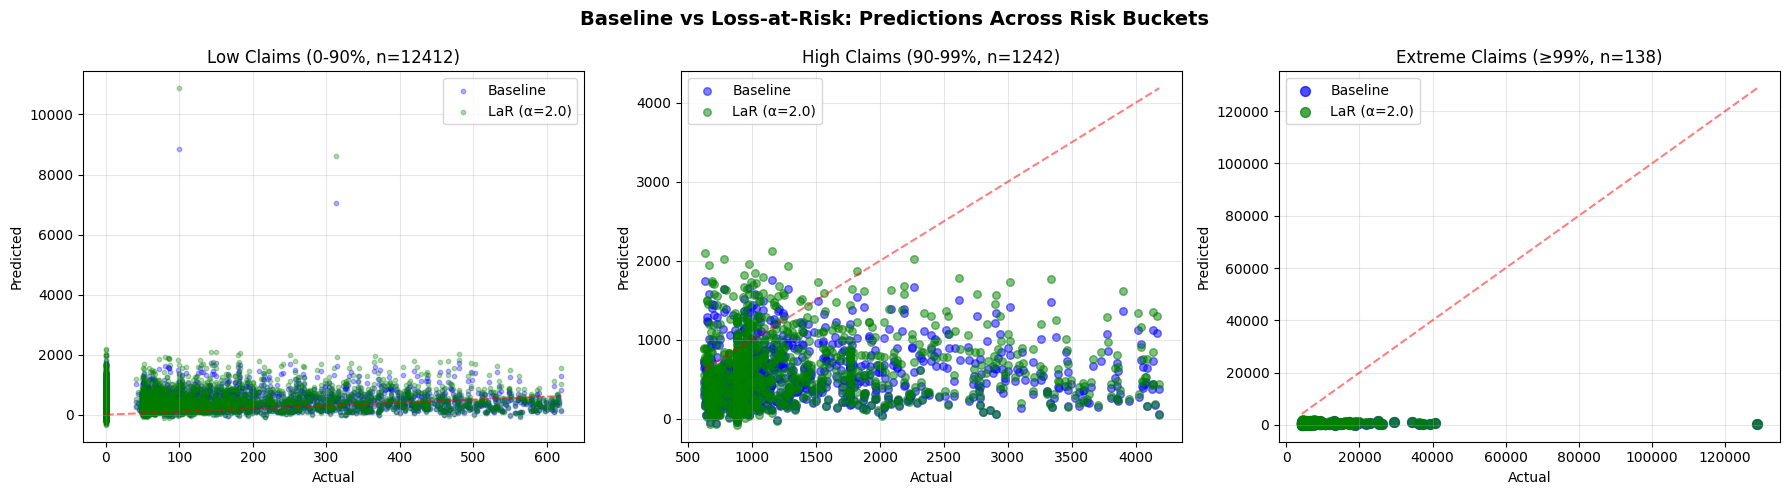

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].scatter(y_test[low_idx], y_pred_base[low_idx], alpha=0.3, s=10, label='Baseline', color='blue')
axes[0].scatter(y_test[low_idx], y_pred_lar_best[low_idx], alpha=0.3, s=10, label='LaR (α=2.0)', color='green')
axes[0].plot([0, y_test[low_idx].max()], [0, y_test[low_idx].max()], 'r--', alpha=0.5)
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')
axes[0].set_title(f'Low Claims (0-90%, n={low_idx.sum()})')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].scatter(y_test[high_idx], y_pred_base[high_idx], alpha=0.5, s=30, label='Baseline', color='blue')
axes[1].scatter(y_test[high_idx], y_pred_lar_best[high_idx], alpha=0.5, s=30, label='LaR (α=2.0)', color='green')
axes[1].plot([y_test[high_idx].min(), y_test[high_idx].max()],
             [y_test[high_idx].min(), y_test[high_idx].max()], 'r--', alpha=0.5)
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')
axes[1].set_title(f'High Claims (90-99%, n={high_idx.sum()})')
axes[1].legend()
axes[1].grid(alpha=0.3)

axes[2].scatter(y_test[extreme_idx], y_pred_base[extreme_idx], alpha=0.7, s=50, label='Baseline', color='blue')
axes[2].scatter(y_test[extreme_idx], y_pred_lar_best[extreme_idx], alpha=0.7, s=50, label='LaR (α=2.0)', color='green')
axes[2].plot([y_test[extreme_idx].min(), y_test[extreme_idx].max()],
             [y_test[extreme_idx].min(), y_test[extreme_idx].max()], 'r--', alpha=0.5)
axes[2].set_xlabel('Actual')
axes[2].set_ylabel('Predicted')
axes[2].set_title(f'Extreme Claims (≥99%, n={extreme_idx.sum()})')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.suptitle('Baseline vs Loss-at-Risk: Predictions Across Risk Buckets', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

now we are gonna be trying Condition value at risk (cVar) takes into account frequency and severity of extreme outcomes, the loss at risk we did will ignore magnitude of loss beyond threshold

In [41]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
residuals = y_test - y_pred

alpha = 0.99
var_threshold = np.quantile(residuals, alpha)
cvar = residuals[residuals >= var_threshold].mean()

print(f"VaR at {alpha*100}%: {var_threshold:.2f}")
print(f"CVaR at {alpha*100}%: {cvar:.2f}")


VaR at 99.0%: 3637.83
CVaR at 99.0%: 10100.89


In [42]:
def cvar_loss(y_true, y_pred, alpha=0.95):
    diff = y_true - y_pred
    var = np.quantile(diff, alpha)
    tail_losses = diff[diff >= var]
    return np.mean(tail_losses ** 2)


In [43]:
cvar_score = cvar_loss(y_test, y_pred, alpha=0.95)
print(f"CVaR Loss (95%): {cvar_score:.2f}")


CVaR Loss (95%): 54351581.35


In [44]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("CVaR Loss (95%):", cvar_loss(y_test, y_pred, alpha=0.95))


MSE: 2808590.911617426
CVaR Loss (95%): 54351581.351210564


In [45]:
baseline_cvar = cvar_loss(y_test, y_pred_base, alpha=0.95)
lar_cvar = cvar_loss(y_test, y_pred_lar_best, alpha=0.95)

print("Baseline CVaR:", baseline_cvar)
print("LaR Model CVaR:", lar_cvar)


Baseline CVaR: 54351581.351210564
LaR Model CVaR: 53861768.97677756


Now the ensemble model

In [46]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

In [47]:
print("Training individual models...")

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf:,.2f}")


gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting MSE: {mse_gb:,.2f}")


xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost MSE: {mse_xgb:,.2f}")

weights_best = 1 + 2.0 * (y_train / np.max(y_train))
lr_lar = LinearRegression()
lr_lar.fit(X_train, y_train, sample_weight=weights_best)
y_pred_lr_lar = lr_lar.predict(X_test)
mse_lr_lar = mean_squared_error(y_test, y_pred_lr_lar)
print(f"Linear Regression (LaR) MSE: {mse_lr_lar:,.2f}")

Training individual models...
Random Forest MSE: 3,424,326.36
Gradient Boosting MSE: 3,016,616.06
XGBoost MSE: 3,255,261.56
Linear Regression (LaR) MSE: 2,815,523.76


In [48]:
print("\nBUILDING VOTING ENSEMBLE...")

voting_ensemble = VotingRegressor([
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)),
    ('gb', GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)),
    ('xgb', xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42))
])

voting_ensemble.fit(X_train, y_train)
y_pred_voting = voting_ensemble.predict(X_test)

mse_voting = mean_squared_error(y_test, y_pred_voting)
mse_voting_extreme = mean_squared_error(y_test[extreme_idx], y_pred_voting[extreme_idx])
cvar_voting = cvar_loss(y_test, y_pred_voting, alpha=0.95)

print(f"Voting Ensemble MSE: {mse_voting:,.2f}")
print(f"MSE on Extreme Tail: {mse_voting_extreme:,.2f}")
print(f"CVaR Loss: {cvar_voting:,.2f}")


BUILDING VOTING ENSEMBLE...
Voting Ensemble MSE: 3,086,548.69
MSE on Extreme Tail: 261,342,966.66
CVaR Loss: 54,449,217.86


In [49]:
print("\nBUILDING STACKING ENSEMBLE...")

base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)),
    ('gb', GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)),
    ('xgb', xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42))
]

stacking_ensemble = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(),
    cv=5
)

stacking_ensemble.fit(X_train, y_train)
y_pred_stacking = stacking_ensemble.predict(X_test)

mse_stacking = mean_squared_error(y_test, y_pred_stacking)
mse_stacking_extreme = mean_squared_error(y_test[extreme_idx], y_pred_stacking[extreme_idx])
cvar_stacking = cvar_loss(y_test, y_pred_stacking, alpha=0.95)

print(f"Stacking Ensemble MSE: {mse_stacking:,.2f}")
print(f"MSE on Extreme Tail: {mse_stacking_extreme:,.2f}")
print(f"CVaR Loss: {cvar_stacking:,.2f}")


BUILDING STACKING ENSEMBLE...
Stacking Ensemble MSE: 2,866,240.41
MSE on Extreme Tail: 266,652,848.74
CVaR Loss: 55,987,445.18


In [50]:
print("\nBUILDING RISK-AWARE CVaR-WEIGHTED ENSEMBLE...")

res_rf  = y_test - y_pred_rf
res_gb  = y_test - y_pred_gb
res_xgb = y_test - y_pred_xgb
res_lar = y_test - y_pred_lr_lar

def cvar_from_residuals(residuals, alpha=0.95):
    VaR = np.quantile(residuals, alpha)
    tail = residuals[residuals >= VaR]
    return tail.mean()

cvars = np.array([
    cvar_from_residuals(res_rf),
    cvar_from_residuals(res_gb),
    cvar_from_residuals(res_xgb),
    cvar_from_residuals(res_lar)
])

print("\nCVaR per model:")
print(f"  Random Forest   : {cvars[0]:,.2f}")
print(f"  Gradient Boost  : {cvars[1]:,.2f}")
print(f"  XGBoost         : {cvars[2]:,.2f}")
print(f"  LaR Regression  : {cvars[3]:,.2f}")

inv = 1 / cvars
weights = inv / inv.sum()

print("\nModel Weights (Inverse CVaR):")
print(f"  w_RF  = {weights[0]:.3f}")
print(f"  w_GB  = {weights[1]:.3f}")
print(f"  w_XGB = {weights[2]:.3f}")
print(f"  w_LaR = {weights[3]:.3f}")

y_pred_risk = (
    weights[0]*y_pred_rf +
    weights[1]*y_pred_gb +
    weights[2]*y_pred_xgb +
    weights[3]*y_pred_lr_lar
)

mse_risk = mean_squared_error(y_test, y_pred_risk)
mse_risk_extreme = mean_squared_error(y_test[extreme_idx], y_pred_risk[extreme_idx])
cvar_risk = cvar_loss(y_test, y_pred_risk, alpha=0.95)

print("\nRISK-AWARE ENSEMBLE PERFORMANCE:")
print(f"  MSE (Overall)       : {mse_risk:,.2f}")
print(f"  MSE (Extreme Tail)  : {mse_risk_extreme:,.2f}")
print(f"  CVaR (95%) Loss     : {cvar_risk:,.2f}")



BUILDING RISK-AWARE CVaR-WEIGHTED ENSEMBLE...

CVaR per model:
  Random Forest   : 3,167.87
  Gradient Boost  : 3,167.95
  XGBoost         : 3,165.83
  LaR Regression  : 3,085.73

Model Weights (Inverse CVaR):
  w_RF  = 0.248
  w_GB  = 0.248
  w_XGB = 0.248
  w_LaR = 0.255

RISK-AWARE ENSEMBLE PERFORMANCE:
  MSE (Overall)       : 2,964,293.03
  MSE (Extreme Tail)  : 260,757,138.35
  CVaR (95%) Loss     : 54,281,855.57


Next phase : Optimized meta learner model

In [51]:
from sklearn.model_selection import KFold
import numpy as np

print("\nPHASE 3 — MICRO STEP 1: Building Meta-Features...")

kf = KFold(n_splits=5, shuffle=True, random_state=42)

meta_train = np.zeros((len(X_train), 4))
meta_test_parts = np.zeros((5, len(X_test), 4))

models = [
    RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
    GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    LinearRegression()
]

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    for m_idx, model in enumerate(models):
        model.fit(X_tr, y_tr)
        meta_train[val_idx, m_idx] = model.predict(X_val)
        meta_test_parts[fold, :, m_idx] = model.predict(X_test)

meta_test = meta_test_parts.mean(axis=0)

print("Meta-train shape:", meta_train.shape)
print("Meta-test shape:", meta_test.shape)



PHASE 3 — MICRO STEP 1: Building Meta-Features...
Meta-train shape: (55167, 4)
Meta-test shape: (13792, 4)


In [52]:
print("\nAdding LaR-weighted Linear Regression...")

alpha = 2.0

meta_train_lar = np.zeros(len(X_train))
meta_test_parts_lar = np.zeros((5, len(X_test)))

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    w = 1 + alpha * (y_tr / y_tr.max())

    lr_lar = LinearRegression()
    lr_lar.fit(X_tr, y_tr, sample_weight=w)

    meta_train_lar[val_idx] = lr_lar.predict(X_val)

    meta_test_parts_lar[fold] = lr_lar.predict(X_test)

meta_test_lar = meta_test_parts_lar.mean(axis=0)

meta_train[:, 3] = meta_train_lar
meta_test[:, 3] = meta_test_lar

print("Updated Meta-train shape:", meta_train.shape)
print("Updated Meta-test shape:", meta_test.shape)
print("Example LaR meta-features:", meta_train[:5, 3])



Adding LaR-weighted Linear Regression...
Updated Meta-train shape: (55167, 4)
Updated Meta-test shape: (13792, 4)
Example LaR meta-features: [613.29646371 819.36017576 950.59902285  73.52639577   1.47214232]


In [53]:
import pandas as pd
import numpy as np

meta_df = pd.DataFrame(meta_train, columns=["RF", "GB", "XGB", "LaR"])

corr_rf  = np.corrcoef(meta_df["RF"],  y_train)[0,1]
corr_gb  = np.corrcoef(meta_df["GB"],  y_train)[0,1]
corr_xgb = np.corrcoef(meta_df["XGB"], y_train)[0,1]
corr_lar = np.corrcoef(meta_df["LaR"], y_train)[0,1]

print("RF correlation :", corr_rf)
print("GB correlation :", corr_gb)
print("XGB correlation:", corr_xgb)
print("LaR correlation:", corr_lar)


RF correlation : 0.050183437781272856
GB correlation : 0.05990175689346257
XGB correlation: 0.048311841310463344
LaR correlation: 0.15207489948665456
